# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-6 (46일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 진료과목 중 내과만 자세히 살피기  -- 대응분석

## 대응분석 관련 정리 계속

대응분석을 설명하기 위해서는 몇가지 기본적인 내용의 정리가 필요합니다. 따라서 관련 내용을 먼저 정리 하고 진료 과목에 대한 대응 분석을 설명할 예정입니다.
여기서 대응분석이라는 것은 일반적으로 두개의 범주형 변수의 관계에 대한 독립성 여부는 카이제곱 분석에 의하여 P 검정을 살펴보게 됩니다.

그러나 다수준인 경우에는 분석시에 복잡한 양상을 띄게 됩니다. 따라서 이 경우에는 수준별 대응 분석을 하게 됩니다. 대응분석은 범주형 변수의 각 수준을 계량화하여 2차원 그래프 상에서 표현하여 두 범주형 변수가 변화는 관계를 살펴보는 것입니다.

이런 내용을 이해 하기 위해서는 선형 대수와 관련 해서 몇가지 기초적인 지식이 필요합니다.

이번에는 PCA 결과 분석 관련 다양한 그래프 표현에 관련해서 설명을 하고 다음에 왜 고유값, 고유벡터를 해야하는지 이유를 설명하겠습니다. 실은 고유벡터는 공분산, 분산과 관련이 있습니다.

### PCA 분석 기초 (http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)

PCA 를 이해하기 위해서는 선형대수의 고유값에 대한 이해가 필요합니다. 그러나 여기서는 깊은 이야기 보다는 직관적으로 이해를 돕도록 설명하고자 합니다.아래 Plot 1A 산점도는 이전 예와 같은 방식으로 차수 축소로 2개의 PCA 로 표시 하였습니다. PCA 는 가장 큰 분산이 가장 중요하다고 생각합니다. 즉 가장 주축 (most principal).  
  
Plot 1A 에서 보면, PC1 축이 제1 주축 (first principal direction) 이고, PC2 축이 제2추축 이 됩니다. PC1 과 PC2 는 서로 직교입니다. 2차원 데이터는 각 샘플 점 에서 제1 주축으로 Projection 하므로써 그림 Plot 1B 가 됩니다. 각 분산에 의해서 나타나는 분산은 고유값이 됩니다. 이 부분은 내일 설명 할 예정입니다. 

<table>
  <tr>
    <th><img src="006-principal-component-analysis-scatter-plot-data-mining-1.png" width="240" alt="" /></th>
    <th><img src="006-principal-component-analysis-scatter-plot-data-mining-2.png" width="240" alt="" /></th>
  </tr> 
</table>

PCA는 특히 매우 큰 상관관계 (correlated) 가 있을 때 매우 유용합니다. 지금은 이정도로 설명하고 다음날 이런 개념에 대해서 설명할 예정입니다.

PCA 분석을 위해서 먼저 두개의 Package 를 설치합니다.

In [1]:
#install.packages(c("FactoMineR", "factoextra"))

In [2]:
# 라이브러리 설정
library("FactoMineR")
library("factoextra")

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


설명 예제로서 factoextra package 에 있는 10종 경기를 사용 할 것입니다.

In [3]:
data(decathlon2)

In [8]:
decathlon2

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar
BARRAS,11.33,6.97,14.09,1.95,49.48,14.48,42.10,4.72,55.40,282.00,11,7708,Decastar
NOOL,11.33,7.27,12.68,1.98,49.20,15.29,37.92,4.62,57.44,266.60,12,7651,Decastar


In [5]:
str(decathlon2)

'data.frame':	27 obs. of  13 variables:
 $ X100m       : num  11 10.8 11 11.3 11.1 ...
 $ Long.jump   : num  7.58 7.4 7.23 7.09 7.3 7.31 6.81 7.56 6.97 7.27 ...
 $ Shot.put    : num  14.8 14.3 14.2 15.2 13.5 ...
 $ High.jump   : num  2.07 1.86 1.92 2.1 2.01 2.13 1.95 1.86 1.95 1.98 ...
 $ X400m       : num  49.8 49.4 48.9 50.4 48.6 ...
 $ X110m.hurdle: num  14.7 14.1 15 15.3 14.2 ...
 $ Discus      : num  43.8 50.7 40.9 46.3 45.7 ...
 $ Pole.vault  : num  5.02 4.92 5.32 4.72 4.42 4.42 4.92 4.82 4.72 4.62 ...
 $ Javeline    : num  63.2 60.1 62.8 63.4 55.4 ...
 $ X1500m      : num  292 302 280 276 268 ...
 $ Rank        : int  1 2 4 5 7 8 9 10 11 12 ...
 $ Points      : int  8217 8122 8067 8036 8004 7995 7802 7733 7708 7651 ...
 $ Competition : Factor w/ 2 levels "Decastar","OlympicG": 1 1 1 1 1 1 1 1 1 1 ...


데이터는 2004년 올림픽과 2004년 Decastar 의 27명 선수 기록입니다.
* row 1:23  까지 자료를 PCA 분석을 하는데 사용할 것입니다.
* row 24:27 자료는 PCA 분석으로 얻어진 자료를 이용하여 예측하는데 사용할 예정입니다.
* col 1:10  PCA 분석으로 사용
* col 11:12 포인트와 순위 기록은 예측에 사용 할 것입니다.


# Let's go

In [9]:
decathlon2.active = decathlon2[1:23, 1:10]
str(decathlon2.active)

'data.frame':	23 obs. of  10 variables:
 $ X100m       : num  11 10.8 11 11.3 11.1 ...
 $ Long.jump   : num  7.58 7.4 7.23 7.09 7.3 7.31 6.81 7.56 6.97 7.27 ...
 $ Shot.put    : num  14.8 14.3 14.2 15.2 13.5 ...
 $ High.jump   : num  2.07 1.86 1.92 2.1 2.01 2.13 1.95 1.86 1.95 1.98 ...
 $ X400m       : num  49.8 49.4 48.9 50.4 48.6 ...
 $ X110m.hurdle: num  14.7 14.1 15 15.3 14.2 ...
 $ Discus      : num  43.8 50.7 40.9 46.3 45.7 ...
 $ Pole.vault  : num  5.02 4.92 5.32 4.72 4.42 4.42 4.92 4.82 4.72 4.62 ...
 $ Javeline    : num  63.2 60.1 62.8 63.4 55.4 ...
 $ X1500m      : num  292 302 280 276 268 ...


In [10]:
head(decathlon2.active)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1


데이터를 비교 하기 위해서 모든 자료를 표준화 하여야 합니다. 이것은 다음과 같은 방식으로 진행 합니다.
$$
\dfrac{x_i - mean(x)}{sd(x)}
$$

참조: FactoMineR 에서 표준화는 자동으로 하므로 표준화 작업을 할 필요는 없습니다.

PCA(X, scale.unit = TRUE, ncp = 5, graph = TRUE)  
X: data frame  
scale.unut: TRUE 면 표준화 로 변환  
ncp:  최종 결과에서 나타날 차원  
graph : TRUE 면 최종으로 그래프 표시  

전날 분석 작업에는 prcomp() 함수를 사용했습니다.


In [11]:
# 라이브러리 지정
library(FactoMineR)

In [15]:
# PCA 분석을 시행합니다.
res.pca = PCA(decathlon2.active, graph = FALSE)

In [21]:
# 결과 를 출력해 봅니다. 
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 23 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

## PCA 결과 해석 및 그래프

PCA 분석에는 여러 패키지가 있습니다. stats::prcomp(), FactoMiner::PCA(), ade4::dudi.pca(), ExPosition::epPCA() 전날에는 prcomp() 를 사용했고 이번에는 PCA() 를 사용했습니다. 어떤 PCA 패키지를 사용하던, 결과를 뽑아서 factorextra R 패키지를 이용하여 그래프를 표현 할 수 있습니다.

### 주성분 (Principal Component = Eigen Value/Variance) 

고유값은 주성분의 분산정도를 표시합니다. 따라서 분산정도가 큰값 즉 고유값이 큰값 순서로 주성분을 정합니다.  먼저 고유값을 출력해 봅니다.

In [22]:
# 라이브러리를 선택합니다.
library(factoextra)

In [23]:
# 고유값을 출력합니다.
eig.val = get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.1242133,41.242133,41.24213
Dim.2,1.8385309,18.385309,59.62744
Dim.3,1.2391403,12.391403,72.01885
Dim.4,0.8194402,8.194402,80.21325
Dim.5,0.7015528,7.015528,87.22878
Dim.6,0.4228828,4.228828,91.45760
Dim.7,0.3025817,3.025817,94.48342
Dim.8,0.2744700,2.744700,97.22812
Dim.9,0.1552169,1.552169,98.78029
Dim.10,0.1219710,1.219710,100.00000


모두 10개의 고유값이 나왔습니다. 누적기여율을 보면, 처음이 41.24% 이고, 그다음까지는 59.62% 입니다. 이제 어디 까지 선택을 하여야 할 지 선택을 하여야 합니다. 고유값은 어디까지 주성분을 선택하여야 할 지를 알려 줍니다.  

그러나 어디 까지 선택하여야 할지에 대한 일반적인 규칙은 아직 없으며, 영역에 맞게 적절하게 선택을 하여야 합니다.    

이번 예제 에서는 72% 를 컷 오프로 하여 선택합니다. 이것은 일반적으로 많아 사용합니다.  

또 다른 방법은 Screen Plot 을 이용하는 이용합니다. Screen Plot 은 고유값을 큰것부터 순서대로 막대그래프로 표현합니다.  

이전에는 plot 을 이용하여 표현하였으니 여기선 fviz_eig() 나 또는 fivz_screenplot() 를 이용합니다. 대체적으로 5번쩨에서 cut-off 합니다.

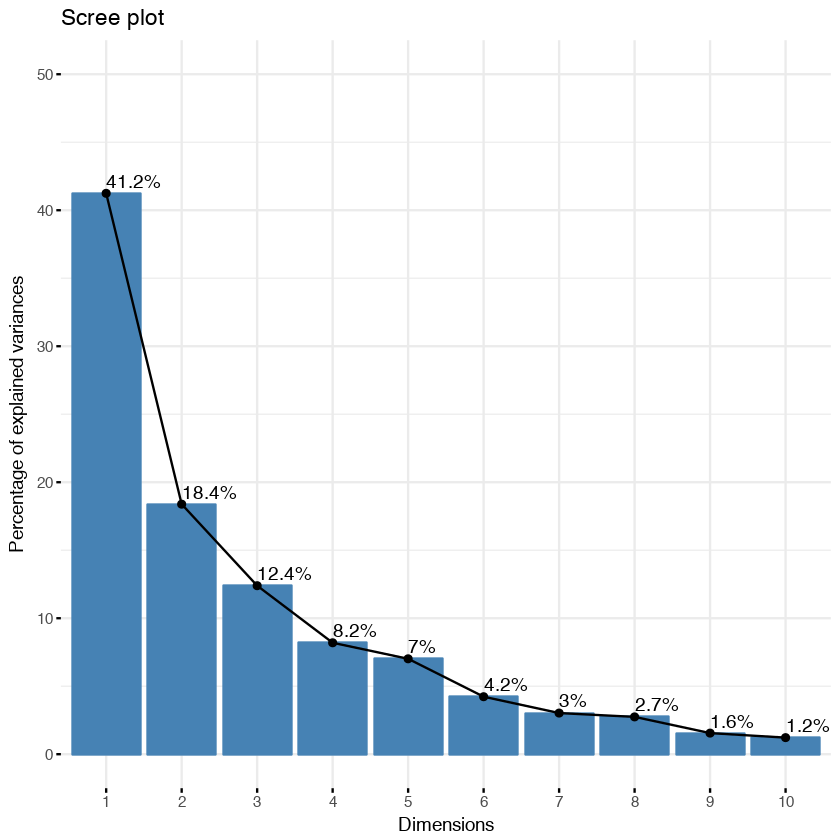

In [40]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0,50))

In [49]:
.f = function() {
Scree.Plot <- function(R,main="Scree Plot",sub=NULL){
  roots <- eigen(R)$values
  x <- 1:dim(R)[1]
  plot(x,roots,type="b",col='blue',ylab="Eigenvalue",
       xlab="Component Number",main=main,sub=sub) 
  abline(h=1,lty=2,col="red")
  
}
R <- cor(orange[,1:7])
Scree.Plot(R,main ="Scree Plot (Husson orange Data)")
}
Scree.Plot = function(eigen_value, main="Screen Plot", sub=NULL) {
    x <- 1:dim(eigen_value)[1]
    plot(x, eigen_value)
}
#Scree.Plot(eig.val)
str(res.pca)

List of 5
 $ eig : num [1:10, 1:3] 4.124 1.839 1.239 0.819 0.702 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "comp 1" "comp 2" "comp 3" "comp 4" ...
  .. ..$ : chr [1:3] "eigenvalue" "percentage of variance" "cumulative percentage of variance"
 $ var :List of 4
  ..$ coord  : num [1:10, 1:5] -0.851 0.794 0.734 0.61 -0.702 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:10] "X100m" "Long.jump" "Shot.put" "High.jump" ...
  .. .. ..$ : chr [1:5] "Dim.1" "Dim.2" "Dim.3" "Dim.4" ...
  ..$ cor    : num [1:10, 1:5] -0.851 0.794 0.734 0.61 -0.702 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:10] "X100m" "Long.jump" "Shot.put" "High.jump" ...
  .. .. ..$ : chr [1:5] "Dim.1" "Dim.2" "Dim.3" "Dim.4" ...
  ..$ cos2   : num [1:10, 1:5] 0.724 0.631 0.539 0.372 0.492 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:10] "X100m" "Long.jump" "Shot.put" "High.jump" ...
  .. .. ..$ : chr [1:5] "Dim.1" "Dim.2" "Dim.3" "Dim.4" ...
  ..$ cont

누적 기여율이 87% 되는 5개의 PC 축을 선택하도록 합니다.

### 변수들의 그래프

##### 결과

결과를 가져오는 간단한 방법은 get_pac_var() 함수를 이용합니다.

In [26]:
var = get_pca_var(res.pca)
print(var)

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               


* **var\$coord** : 산점도를 그리기 위한 변수
* **var\$cos2** : var.coord \* var.coord
* **var\$contrib** : 주성분 축에 기여하는 변수의 퍼센트 기여도. 

In [28]:
# 값을 살펴보면
head(var$coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.8506257,-0.17939806,0.3015564,0.03357320,-0.1944440
Long.jump,0.7941806,0.28085695,-0.1905465,-0.11538956,0.2331567
Shot.put,0.7339127,0.08540412,0.5175978,0.12846837,-0.2488129
High.jump,0.6100840,-0.46521415,0.3300852,0.14455012,0.4027002
X400m,-0.7016034,0.29017826,0.2835329,0.43082552,0.1039085
X110m.hurdle,-0.7641252,-0.02474081,0.4488873,-0.01689589,0.2242200


In [30]:
head(var$cos2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,0.7235641,0.0321836641,0.09093628,0.0011271597,0.03780845
Long.jump,0.6307229,0.0788806285,0.03630798,0.0133147506,0.05436203
Shot.put,0.5386279,0.0072938636,0.26790749,0.0165041211,0.06190783
High.jump,0.3722025,0.2164242070,0.10895622,0.0208947375,0.16216747
X400m,0.4922473,0.0842034209,0.08039091,0.1856106269,0.01079698
X110m.hurdle,0.5838873,0.0006121077,0.20149984,0.0002854712,0.05027463


In [31]:
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,17.544293,1.7505098,7.338659,0.13755240,5.389252
Long.jump,15.293168,4.2904162,2.930094,1.62485936,7.748815
Shot.put,13.060137,0.3967224,21.620432,2.01407269,8.824401
High.jump,9.024811,11.7715838,8.792888,2.54987951,23.115504
X400m,11.935544,4.5799296,6.487636,22.65090599,1.539012
X110m.hurdle,14.157544,0.0332933,16.261261,0.03483735,7.166193


### 상관도 원 (Correlation circle)

PC(principal component) 와 변수 사이의 상관관계.

In [32]:
head(var$coord, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.8506257,-0.17939806,0.3015564,0.0335732,-0.1944440
Long.jump,0.7941806,0.28085695,-0.1905465,-0.1153896,0.2331567
Shot.put,0.7339127,0.08540412,0.5175978,0.1284684,-0.2488129
High.jump,0.6100840,-0.46521415,0.3300852,0.1445501,0.4027002


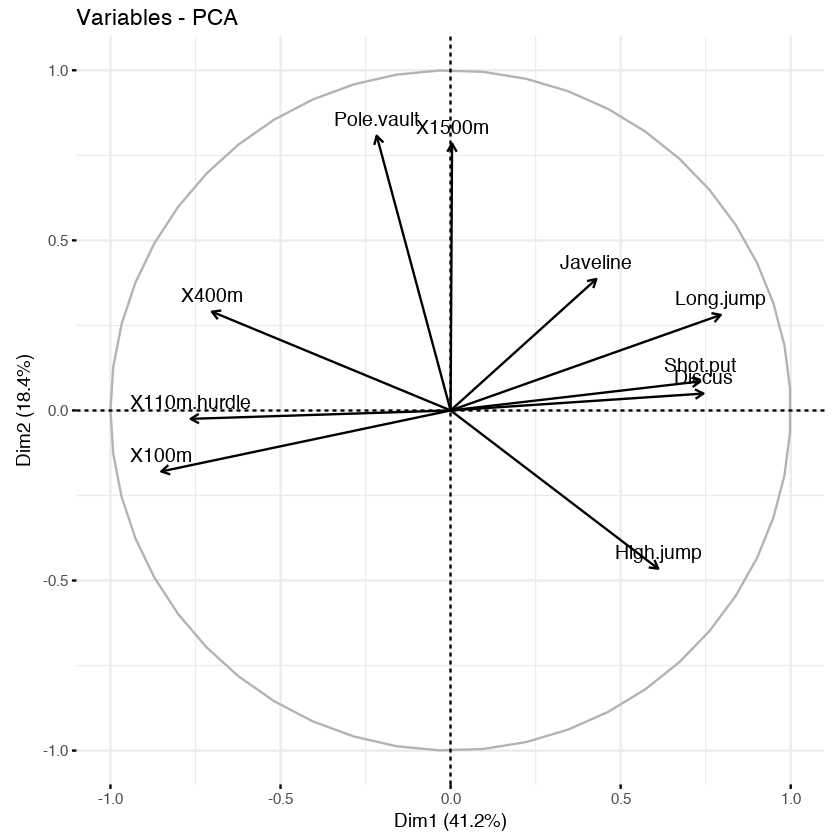

In [36]:
# 그래프는 다음과 같다.
fviz_pca_var(res.pca, cor.var="black")

* 